# Introduction

In this notebook, we will try to create a geometric intuition about neural networks by building a simple one from scratch using numpy.

There are lots of references about how artificial neural networks are inspired by the structure of biological neurons, so we won't dwell on it too much. However, for those of us who learned how to do matrix multiplication in school, there is another inerpretation: A simple neural network simply takes a linear combination of its inputs (or equivalently, multiplies its inputs by a weight matrix) and applies an activation function to produce an output. Too abstract? Let's implement one and visualize it.

First, let's import some widgets and define some functions to display them.

In [23]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

%matplotlib notebook

x_min, x_max, y_min, y_max = -5, 5, -5, 5
N = 100

def draw(x, y, ax, label=None, clear=True):
    if clear:
        ax.clear()
        ax.grid(True)
        ax.set_xlim([x_min, x_max])
        ax.set_ylim([x_min, x_max])
        plt.axvline(x=0, c="black")
        plt.axhline(y=0, c="black")
    ax.scatter(x, y, label=label)
    if label is not None:
        plt.legend()

def display_slider(label, value=0):
    slider = widgets.FloatSlider(
        value=value, 
        min=-10, max=10, step=.1,
        description=label,
        continuous_update=True
    )
    slider.observe(update, 'value')
    display(slider)
    return slider

def display_text(value='', label='Loss'):
    text = widgets.HTML(
        value=str(value), 
        description=label
    )
    display(text)
    return text

# A single-neuron network?

Now, let's define `net`, our simple neural network. In fact, it would be a stretch to even call this a network, as there is only one neuron. This neuron has a single scalar weight and bias, and accepts one dimensional inputs and emits one dimensional outputs. In our case, the neuron "projects" a basis vector (the x-axis) on to two dimensional space.

Play around with the weights and note that we can model __any__ line by finding the appropriate combination of weights and biases.

<IPython.core.display.Javascript object>


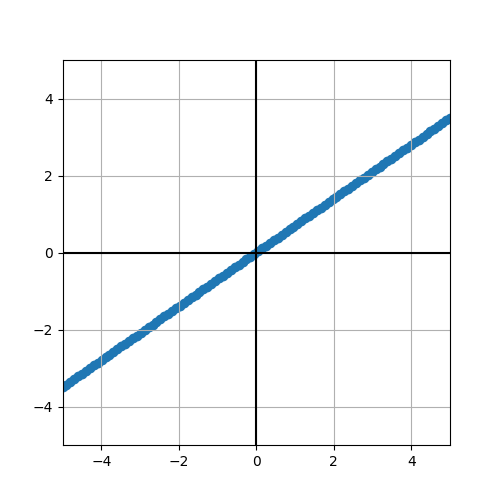

FloatSlider(value=0.0, description='Weight', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='Bias', max=10.0, min=-10.0)

In [9]:
import numpy as np

x = np.linspace(x_min, x_max, N)

def net(x, w, b):
    return w * x + b
 
fig, ax = plt.subplots(figsize=(x_max, y_max))
draw(x, net(x, w=0, b=0), ax)
    
def update(change):
    draw(x, net(x, w=weight_slider.value, b=bias_slider.value), ax)
    
weight_slider = display_slider('Weight')
bias_slider = display_slider('Bias')

# What's this network good for?

Since we can use this network to model any line, it's a perfect candidate for linear regression. With a little experimentation, we should be able to fit a line to a linear cluster of data. Note the section that prints the loss, the mean squared error between the fitted line and the actual data. This is our objective function (because our objective is to minimize this loss).

<IPython.core.display.Javascript object>


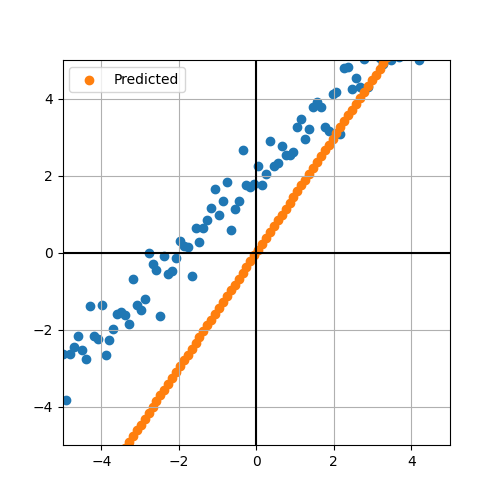

FloatSlider(value=0.0, description='Weight', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='Bias', max=10.0, min=-10.0)

HTML(value='12.46', description='Loss')

In [28]:
fig, ax = plt.subplots(figsize=(x_max, y_max))

w_actual = 1
b_actual = 2
y = w_actual * x + b_actual + np.random.normal(0, .5, N)
y_pred = net(x, w=0, b=0)

def mse(y, y_pred):
    return str(((y - y_pred) ** 2).mean().round(2))

loss = mse(y, y_pred)

draw(x, y, ax)
draw(x, y_pred, ax, clear=False, label='Predicted')

def update(change):
    y_pred = net(x, w=weight_slider.value, b=bias_slider.value)
    loss = mse(y, y_pred)
    textarea.value = loss
    
    draw(x, y, ax)
    draw(x, y_pred, ax, clear=False, label='Predicted')

weight_slider = display_slider('Weight')
bias_slider = display_slider('Bias')
textarea = display_text(loss)

# But finding the weights manually is so tedious!

Indeed. Fortunately, there's a technique called gradient descent to incrementally find these optimal weights. A complete description of gradient is descent is out of this notebook's scope, but we can attempt a quick overview.

Recall the loss function from the previous section? Our aim is to minimize it. To do this, one question we could ask ourselves is how the loss would change if the weight is updated slightly. If the loss increases when the weight increases slightly, then we know that we should decrease the weight to reduce the loss. If it were the other way around, then we should increase the weight.

As per calculus, the rate of change of the loss $L$ with respect to the weight $W$ is given by $\dfrac{dL}{dW}$. Given $N$ samples of the actual data $y$ and the predictions $\hat{y}$, we can substitute $L = \dfrac{\sum{(\hat{y} - y) ^ 2}}{N}$ and use the chain rule to find $\dfrac{dL}{dW}$.

However, we are instead going to use an awesome technique called reverse mode automatic differentiation to find $\dfrac{dL}{dW}$. This can be quite tricky to wrap your head around, so I'll direct you to this video for a much better explanation. Nonetheless, I'll provide a brief summary here.

We'll start by evaluating the loss (or any other expression, for that matter) the way a computer does: variable-by-variable. For example, in the expression $2 * 3 + 5$, 2 and 3 are first multiplied and its product is stored in a register before 5 is finally added to it. Similarly, in the following equations, we'll evaluate the loss, where in each step we'll calculate the intermediate variable $l_i$, as we'll as the derivative of this intermediate variable with respect to its inputs (It will soon be clear why we do this).

First, we multiply the weight $W$ with the 

<IPython.core.display.Javascript object>


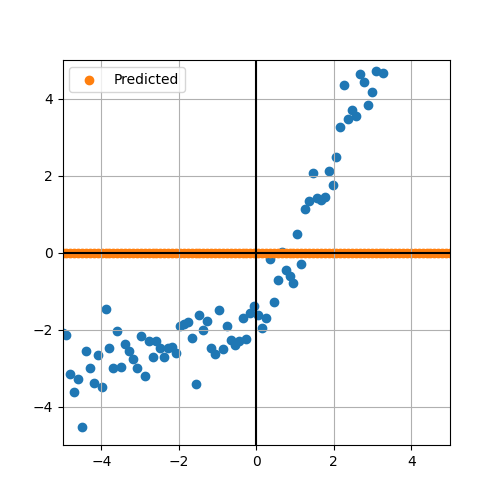

FloatSlider(value=0.0, description='Weight', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='Bias', max=10.0, min=-10.0)

In [4]:
fig, ax = plt.subplots(figsize=(x_max, y_max))

w1_actual = 0.2
b1_actual = -2
w2_actual = 2
y = w1_actual * x + b1_actual + np.random.normal(0, .5, N)

y[N // 2:] += w2_actual * x[N // 2:]

draw(x, y, ax)
draw(x, net(x, w=0, b=0), ax, clear=False, label='Predicted')

def update(change):
    draw(x, y, ax)
    draw(x, net(x, w=weight_slider.value, b=bias_slider.value), ax, clear=False, label='Predicted')

weight_slider = display_slider('Weight')
bias_slider = display_slider('Bias')

<IPython.core.display.Javascript object>


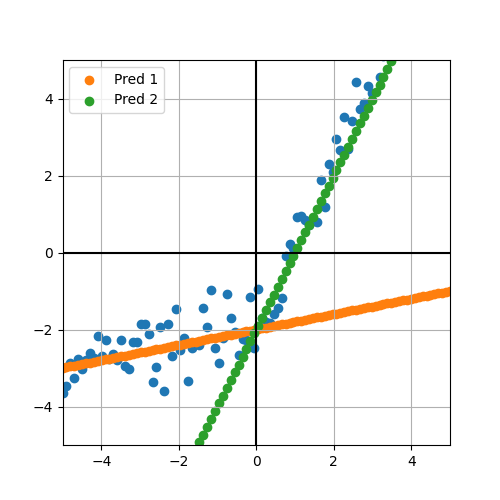

In [5]:
fig, ax = plt.subplots(figsize=(x_max, y_max))

w1_actual = 0.2
b1_actual = -2
w2_actual = 2
y = w1_actual * x + b1_actual + np.random.normal(0, .5, N)

y[N // 2:] += w2_actual * x[N // 2:]

draw(x, y, ax)
draw(x, net(x, w=w1_actual, b=b1_actual), ax, clear=False, label='Pred 1')
draw(x, net(x, w=w2_actual, b=b1_actual), ax, clear=False, label='Pred 2')

<IPython.core.display.Javascript object>


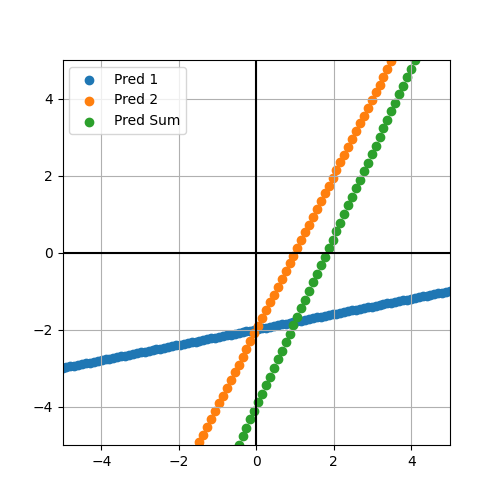

FloatSlider(value=0.2, description='Weight 1', max=10.0, min=-10.0)

FloatSlider(value=-2.0, description='Bias 1', max=10.0, min=-10.0)

FloatSlider(value=2.0, description='Weight 2', max=10.0, min=-10.0)

FloatSlider(value=-2.0, description='Bias 2', max=10.0, min=-10.0)

In [6]:
fig, ax = plt.subplots(figsize=(x_max, y_max))

w1, w2, b1, b2 = .2, 2, -2, -2

draw(x, net(x, w=w1, b=b1), ax, label='Pred 1')
draw(x, net(x, w=w2, b=b2), ax, clear=False, label='Pred 2')
draw(x, net(x, w=(w1 + w2), b=(b1 + b2)), ax, clear=False, label='Pred Sum')

def update(change):
    w1, w2, b1, b2 = weight_slider1.value, weight_slider2.value, bias_slider1.value, bias_slider2.value
    draw(x, net(x, w=w1, b=b1), ax, label='Pred 1')
    draw(x, net(x, w=w2, b=b2), ax, clear=False, label='Pred 2')
    draw(x, net(x, w=(w1 + w2), b=(b1 + b2)), ax, clear=False, label='Pred Sum')
    
weight_slider1 = display_slider('Weight 1', value=w1)
bias_slider1 = display_slider('Bias 1', value=b1)
weight_slider2 = display_slider('Weight 2', value=w2)
bias_slider2 = display_slider('Bias 2', value=b2)

<IPython.core.display.Javascript object>


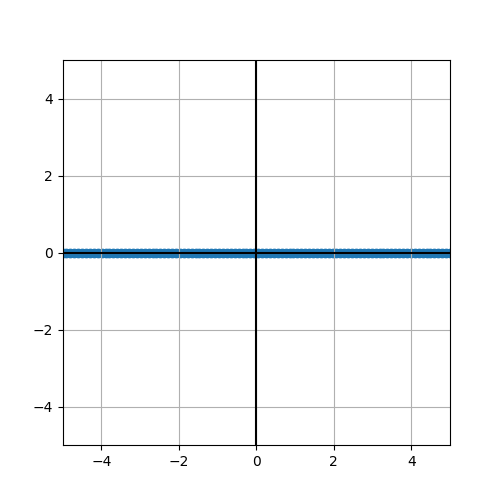

FloatSlider(value=0.2, description='Weight 1', max=10.0, min=-10.0)

FloatSlider(value=-2.0, description='Bias 1', max=10.0, min=-10.0)

FloatSlider(value=2.0, description='Weight 2', max=10.0, min=-10.0)

FloatSlider(value=-2.0, description='Bias 2', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='Bias Output', max=10.0, min=-10.0)

In [8]:
fig, ax = plt.subplots(figsize=(x_max, y_max))

def net(x, w, b, b_out=0):
    return np.maximum(0, w * x + b) + b_out

w1, w2, b1, b2 = .2, 2, -2, -2
b_out = 0

def _draw(w1, b1, w2, b2, b_out):
    neuron1_output = net(x, w=w1, b=b1, b_out=b_out)
    neuron2_output = net(x, w=w2, b=b2, b_out=b_out)
    draw(x, y, ax)
    draw(x, neuron1_output, ax, clear=False, label='Pred 1')
    draw(x, neuron2_output, ax, clear=False, label='Pred 2')
    draw(x, neuron1_output + neuron2_output, ax, clear=False, label='Pred Sum')

_draw(w1, b1, w2, b2, b_out)
    
def update(change):
    w1, w2, b1, b2 = weight_slider1.value, weight_slider2.value, bias_slider1.value, bias_slider2.value
    b_out = bias_slider3.value
    _draw(w1, b1, w2, b2, b_out)
    
weight_slider1 = display_slider('Weight 1', value=w1)
bias_slider1 = display_slider('Bias 1', value=b1)
weight_slider2 = display_slider('Weight 2', value=w2)
bias_slider2 = display_slider('Bias 2', value=b2)
bias_slider3 = display_slider('Bias Output', value=b_out)

<IPython.core.display.Javascript object>


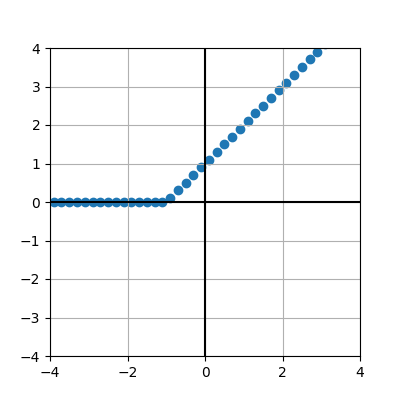

FloatSlider(value=1.0, description='Weight 1', max=10.0, min=-10.0)

FloatSlider(value=1.0, description='Weight 2', max=10.0, min=-10.0)

FloatSlider(value=1.0, description='Bias 1', max=10.0, min=-10.0)

FloatSlider(value=1.0, description='Bias 2', max=10.0, min=-10.0)

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

%matplotlib notebook

b = 1
x = np.linspace(-100, 100, 1000)
y = np.maximum(0, x + b)
 
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x, y)
ax.grid(True)
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
 
def update(change):
    ax.clear()
    ax.grid(True)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    plt.axvline(x=0, c="black", label="x=0")
    plt.axhline(y=0, c="black", label="y=0")
    ax.scatter(x, np.maximum(0, x * w1_slider.value + b1_slider.value) * w2_slider.value + b2_slider.value)
    #fig.canvas.draw()
        
w1_slider = widgets.FloatSlider(
    value=1, 
    min=-10, max=10, step=.1,
    description='Weight 1',
    continuous_update=True
)
w1_slider.observe(update, 'value')
display(w1_slider)
w2_slider = widgets.FloatSlider(
    value=1, 
    min=-10, max=10, step=.1,
    description='Weight 2',
    continuous_update=True
)
w2_slider.observe(update, 'value')
display(w2_slider)
b1_slider = widgets.FloatSlider(
    value=1, 
    min=-10, max=10, step=.1,
    description='Bias 1',
    continuous_update=True
)
b1_slider.observe(update, 'value')
display(b1_slider)
b2_slider = widgets.FloatSlider(
    value=1, 
    min=-10, max=10, step=.1,
    description='Bias 2',
    continuous_update=True
)
b2_slider.observe(update, 'value')
display(b2_slider)

In [94]:
class Net:
    def __init__(self):
        
    def forward(self, x)

IndentationError: expected an indented block (3198897667.py, line 4)